# Install libraries
PYCARET is an auto-ML library. It runs many models, and performs hyper-parameter optimization, so it is great to explore how differrent models fit the data.
However, it has many requierements. Like old versions of common libraries that need to be un-installed and then reinstalled.

In [ ]:
# REQUIERES TO RE-START RUNTIME   - THIS IS WHY IT PUT IT FIRST IN THE CODE
!pip install --pre pycaret                          # pre release version >=3.0.0rc4
from pycaret.datasets import get_data               # classification requieres this module

In [2]:
from pycaret.classification import *                # RUN SEPARETLY. classification modules
from pycaret.utils import version                   # print version
print('Pycaret', version() )                        # current 3.0.0rc4
!python --version                                   # current 3.8.16  -- just to check

Pycaret 3.0.0.rc4
Python 3.8.16


Mount GoogleDrive, where I put the input airport **dataset_SCL.csv** file

In [3]:
# MOUNT GOOGLE DRIVE
from google.colab import drive                          # to use Gdrive files
drive.mount('/content/g/', force_remount=False)         # as root folder

Mounted at /content/g/


In [4]:
# set working DIRECTORY
%cd /content/g/MyDrive/Globant LATAM challenge
print('\n',end='') 
!ls

/content/g/MyDrive/Globant LATAM challenge

'Challenge - Data Scientist.pdf'   solution.ipynb
 dataset_SCL.csv		   synthetic_features.csv


Install of other libraries that I might use

In [5]:
%%capture
import pandas as pd
import numpy as np                                  # not using it yet
from datetime import datetime                       # to convert time from string to number
import re                                           # REGEX to rename cell content


# PLOTS
import matplotlib.pyplot as plt
import matplotlib as mpl                            # for color bars
from matplotlib.ticker import MultipleLocator, AutoMinorLocator


# MACHINE LEARNING
!pip install sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors       import KNeighborsClassifier  # for SFS
from sklearn.linear_model    import LogisticRegression , RidgeClassifierCV
from sklearn.ensemble        import RandomForestClassifier
from sklearn.preprocessing   import StandardScaler, OneHotEncoder, KBinsDiscretizer     
from sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics         import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from imblearn.over_sampling  import SMOTE                               # for imbalenced samples
#from sklearn.feature_selection import SequentialFeatureSelector        # feature selection wrapper
#from mlxtend.feature_selection import SequentialFeatureSelector        # feature selection wrapper
import statsmodels.api as sm

# HTML DISPLAY
from IPython.display import HTML, display
def set_css():                                      # function to pre-warp results
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)  # execute the pre-warpp

# import the dataset
The **'dataset_SCL.csv'** files is converted from CSV to a PANDAS DataFrame, to analize it in detail.

The name will be **airport_raw**.

In [6]:
airport_raw = pd.read_csv( r'dataset_SCL.csv' , header=0 )
display( airport_raw )

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


Check the data type

In [7]:
airport_raw.info()                                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


Extract the name of the columns into the list **cols_raw**

In [8]:
cols_raw = list( airport_raw.columns )      # LIST of COL names
#cols_raw = list( filter(None, airport_raw.columns ))
print('\033[1m','airpot_raw columns (', len(cols_raw ),  '):\n','\033[0m', sep='')
print( cols_raw )

airpot_raw columns (18):

['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O', 'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES']


# Check the data

In [9]:
cols_raw = list( airport_raw.columns )

In [10]:
def func_col_stats ( df ) :                            # 'col'

    """ INPUT : dataframe
        OUTPUT: number of unique elements in each column  """
    
    # print generalities of the DataFrame
    print('Contains ','\033[1m', f"{df.shape[0]:,d}" , ' rows ','\033[0m','and ','\033[1m', f"{df.shape[1]:,d}", ' columns', '\033[0m', sep='')
    total_cells = df.shape[0] * df.shape[1]     # total number of cells int he csv
    empty_cells = df.isnull().sum().sum()
    percentage = empty_cells * 100 / total_cells        # % of empty cells int he csv
    print("a total of",'\033[1m',  f"{total_cells:,d}", 'cells','\033[0m', end=" ")
    print(", of which",'\033[1m', f"{empty_cells:,d}" ,'\033[0m', end=" ")
    print('(', "{:.1f}".format(percentage), ' %)', ' are empty.','\n', sep="")

    cols = list( df.columns )

    # print specific data for each column of the DataFrame
    for col in cols :
        print('Column: \t\t','\033[1m', df[col] .name,  '\033[0m',sep="" )      # print COL name
        distinct = df[col] .value_counts(dropna=False)
        print( '\033[3m','Distinct elements:\t','\033[0m', '{:,.0f}'.format(len( distinct )), sep='')                    # print whole value count
        #if df[col] .dtypes == 'O' :
        #    print( '\033[3m','Most frecuent    :\t','\033[0m', df[col] .value_counts()[0].index.tolist() )

        #print( len(distinct).map('{:,.0f}'.format).to_string())                     # print whole value count
        print('\n', end='')



In [13]:
func_col_stats ( airport_raw )

Contains 68,206 rows and 18 columns
a total of  1,227,708 cells  , of which  1  (0.0 %) are empty.

Column: 		Fecha-I
Distinct elements:	53,252

Column: 		Vlo-I
Distinct elements:	750

Column: 		Ori-I
Distinct elements:	1

Column: 		Des-I
Distinct elements:	64

Column: 		Emp-I
Distinct elements:	30

Column: 		Fecha-O
Distinct elements:	62,774

Column: 		Vlo-O
Distinct elements:	867

Column: 		Ori-O
Distinct elements:	1

Column: 		Des-O
Distinct elements:	63

Column: 		Emp-O
Distinct elements:	32

Column: 		DIA
Distinct elements:	31

Column: 		MES
Distinct elements:	12

Column: 		AÑO
Distinct elements:	2

Column: 		DIANOM
Distinct elements:	7

Column: 		TIPOVUELO
Distinct elements:	2

Column: 		OPERA
Distinct elements:	23

Column: 		SIGLAORI
Distinct elements:	1

Column: 		SIGLADES
Distinct elements:	62



# consolidation

First, lets make a copy of the pandas dataframe, since we are going to modify the data.

I do this to prevent operating over an already modified data, wich could accumulate errors easily

In [14]:
airport = airport_raw.copy(deep=True) 

Printing the first element of the 'Fecha-I' column, we can see that time is a sting, and we need to change it to time class in order to make calculations

In [15]:
airport['Fecha-I'][0]

'2017-01-01 23:30:00'

Lets convert string to date-time object

In [16]:
t1 = datetime.strptime( airport_raw['Fecha-I'][0]   , '%Y-%m-%d %H:%M:%S')
t2 = datetime.strptime( airport_raw['Fecha-I'][100] , '%Y-%m-%d %H:%M:%S')
delta = t2 - t1
print( type(delta) )
delta

<class 'datetime.timedelta'>


datetime.timedelta(days=20, seconds=50700)

Great, the conversion is working, and I can now calculate time differences.

In [17]:
# transform datetime using pandas
airport['Fecha-O'] = pd.to_datetime(airport_raw['Fecha-O'])
airport['Fecha-I'] = pd.to_datetime(airport_raw['Fecha-I'])

# to check conversion
print(airport['Fecha-O'][0] )
print(airport['Fecha-O'].dtypes)

#other way (not ussing it now)
#airport['Fecha-I'] =  pd.to_datetime(airport_raw['Fecha-I'], format='%Y-%m-%d %H:%M:%S')
#airport['Fecha-O'] =  pd.to_datetime(airport_raw['Fecha-O'], format='%Y-%m-%d %H:%M:%S')

#print(f'Time difference is {delta.total_seconds() / 60 } minutes') # formating in unites

2017-01-01 23:33:00
datetime64[ns]


Time conversion worked.

# QUESTION 1

ESTA LA RESPONDÍ EN LOS GRÁFICOS

# QUESTION 2:

○ temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

○ dif_min : diferencia en minutos entre Fecha-O y Fecha-I .

○ atraso_15 : 1 si dif_min > 15, 0 si no.

○ periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .


## temporada_alta
The tool to bin numerical data into categorical data, that I nowof, is pandas CUT.

First, lets find the min and max datetimes, since these 2 will be the edges of my binning

In [18]:
print('FIRST flight in dataset:   ', airport_raw['Fecha-I'].min() )
print('LAST  flight in dataset:   ', airport_raw['Fecha-I'].max() )

FIRST flight in dataset:    2017-01-01 00:15:00
LAST  flight in dataset:    2017-12-31 23:55:00


All the scheduled flights are within the same year, this makes things easier.

The binning was set including the last day. eg: temporada alta lates till the last minute of March 03


In [19]:
airport['temporada_alta'] = pd.cut( airport['Fecha-I'],  
    bins = [ airport['Fecha-I'].min(),                                          # desde 1 enero   (comienzo vacaciones verano)
             datetime.strptime('2017-03-03 23:59:59', '%Y-%m-%d %H:%M:%S'),     # hasta 3 marzo
             datetime.strptime('2017-07-15 00:00:00', '%Y-%m-%d %H:%M:%S'),     # desde 15 jul    (comienzo vacaciones invierno)
             datetime.strptime('2017-07-31 23:59:59', '%Y-%m-%d %H:%M:%S'),     # hasta 31 jul
             datetime.strptime('2017-09-11 00:00:00', '%Y-%m-%d %H:%M:%S'),     # desde 11 sept   (comienzo vacaciones fiestas patrias)
             datetime.strptime('2017-09-30 23:59:59', '%Y-%m-%d %H:%M:%S'),     # hasta 30 sept
             datetime.strptime('2017-12-15 00:00:00', '%Y-%m-%d %H:%M:%S'),     # desde 15 dic    (comienzo vacaciones verano)
             airport['Fecha-I'].max()]  ,                                       # fin de año
    labels = [1,0,1,0,1,0,1],
    right  = True,                                                              # bins [1, 2, 3] indicate labels (1,2], (2,3]
    ordered = False )                                                           # allow duplicate labels

# checking if the binning worked
print( airport['temporada_alta'].value_counts() , '\n')
airport[['Fecha-I','temporada_alta']].head(3)

0    45444
1    22761
Name: temporada_alta, dtype: int64 



,Fecha-I,temporada_alta
0,2017-01-01 23:30:00,1
1,2017-01-02 23:30:00,1
2,2017-01-03 23:30:00,1


## dif_min

I realized that the flights that depart early have the format: -1 days +23:58:00

This one departs 2 mins ahead of time, but because of the -1 day, it adds a whole day to the value (extra 8640 seconds). So I had to figure out how to solve this.

In [20]:
# Calculate the substraction for the delay ['Fecha-O'] - ['Fecha-I']  (input and output in datetime format)
# then change timedelta in datetime format to minutes
airport['dif_min'] = ( airport['Fecha-O'] - airport['Fecha-I'] ) / pd.Timedelta(minutes=1)
airport['dif_min'][0:11]

0      3.0
1      9.0
2      9.0
3      3.0
4     -2.0
5     34.0
6     -5.0
7     -5.0
8     40.0
9     69.0
10    -9.0
Name: dif_min, dtype: float64

Now lets see how the dalay looks in a histogram

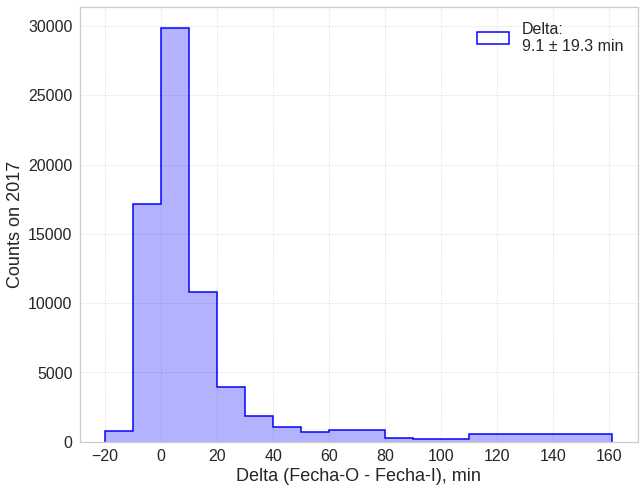

In [21]:
# parameters to calculate histogram (every 10 mins)
bins= [  min(airport['dif_min'].min(), -20),
         -10, 0, 10,20,30,40,50,60,
         80,90,100,110,
         max(airport['dif_min'].max(), 120)   ]
density = False         # True means normalized, False is absolute counts

temp_mean = airport['dif_min'].mean()
temp_std  = airport['dif_min'].std()
non_str  = '{:,.1f}'.format( temp_mean ) + ' \u00B1 '  +  '{:,.1f}'.format( temp_std )

# plot Histogram
fig , axe = plt.subplots(1,1, figsize=(10, 8) )

plt.hist( airport['dif_min'] , 
          histtype='step'      , density = False, bins=bins, color='blue', lw=1.5, ) #histtype='barstacked'  'step'

plt.hist( airport['dif_min'] , 
          histtype='barstacked', density = False, bins=bins, color='blue', alpha = 0.3 ) #histtype='barstacked'  'step'


# display customization
plt.xlabel('Delta (Fecha-O - Fecha-I), min', fontsize=18)
plt.ylabel('Counts on 2017', fontsize=18)

axe.tick_params(labelsize=16)
axe.xaxis.set_major_locator(MultipleLocator(20))
axe.xaxis.set_minor_locator(MultipleLocator(10))

plt.grid(b=None, which='major', axis='both')
axe.grid(linestyle=':', linewidth='0.5', color='gray', alpha = 0.6)

plt.legend( ['Delta:'+'\n' + non_str + ' min'], fontsize=16, loc ='upper right')
plt.show()

According to this data:
1. there are lots of lfights that depart before scheduled.
2. Most flights depart with a delay of 10 minutes.
3. Long delays are infrecuent.
4. there is a special case of delay that takes ~2.5 hrs

## atraso_15

In [22]:
airport['atraso_15'] = pd.cut( airport['dif_min'],  
    bins = [ airport['dif_min'].min(),                                          # desde 1 enero   (comienzo vacaciones verano)
             15,
             airport['dif_min'].max()]  ,                                       # fin de año
    labels = [0,1],
    right  = True,                                                              # bins [1, 2, 3] indicate labels (1,2], (2,3]
    ordered = False ).astype(float)                                                           # allow duplicate labels

airport['atraso_15'].value_counts()

0.0    55465
1.0    12614
Name: atraso_15, dtype: int64

## **periodo_dia**

the 'Fecha-I' column is still in datetime format.

Used dt.time to extract the time into the 'Hora-I' new column

In [23]:
airport['Hora-I'] =  pd.to_datetime(airport['Fecha-I'].dt.time, format='%H:%M:%S')

In [24]:
airport['periodo_dia'] = pd.cut( airport['Hora-I'],  
    bins = [ datetime.strptime('00:00:00', '%H:%M:%S'),     # hasta 3 marzo
             datetime.strptime('04:59:59', '%H:%M:%S'),     # desde 15 jul    (comienzo vacaciones invierno)
             datetime.strptime('11:59:59', '%H:%M:%S'),     # hasta 31 jul
             datetime.strptime('18:59:59', '%H:%M:%S'),     # desde 11 sept   (comienzo vacaciones fiestas patrias)
             datetime.strptime('23:59:59', '%H:%M:%S')],
    labels = ['noche','mañana','tarde','noche'],
    right  = True,                                                              # bins [1, 2, 3] indicate labels (1,2], (2,3]
    ordered = False )

airport['periodo_dia'].value_counts()

tarde     25506
mañana    25352
noche     17346
Name: periodo_dia, dtype: int64

## export

file was stores on the Google Drive directory set at the begining

In [25]:
airport[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv', sep='\t')

# QUESTION 3

**Pregunta: ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?**

Como 'atraso_15' tiene valoRES de 0 y 1, al calcular promedios agrupados, estos van a corresponder a la tasa de atrazo, que voy a expresar como porcentaje.

**Pregunta: ¿Qué variables esperarías que más influyeran en predecir atrasos?**

La Aerolinea y el destino son las 2 variable que mayor varianza exhiben en cuento al delay sobre 15 minutos, por lo que anticipo que debiese ser importante en la predicción.

DESTINO

In [26]:
atraso_destino = airport.groupby('Des-I')['atraso_15'].mean() *100 
atraso_destino = atraso_destino.to_frame()
atraso_destino.rename(columns={'atraso_15':'atraso_%',}, inplace=True)  
atraso_destino['atraso_%'] = atraso_destino['atraso_%'].apply(lambda x: round(x, 1))     # Left the date with a single decimal digit.

display(atraso_destino['atraso_%'].sort_values(axis=0,ascending=False))

Des-I
EGYP    100.0
SLCB    100.0
SEQU    100.0
SEQM    100.0
SAWH     66.7
        ...  
KIAH      5.2
SBCT      0.0
SARI      0.0
SPSO      0.0
SBFI      0.0
Name: atraso_%, Length: 64, dtype: float64

AEROLINEA

In [27]:
atraso_aerolinea = airport.groupby('OPERA')['atraso_15'].mean() *100
atraso_aerolinea = atraso_aerolinea.to_frame() 
atraso_aerolinea.rename(columns={'atraso_15':'atraso_%',}, inplace=True)  
atraso_aerolinea['atraso_%'] = atraso_aerolinea['atraso_%'].apply(lambda x: round(x, 1)) 
display(atraso_aerolinea['atraso_%'].sort_values(axis=0,ascending=False) )

OPERA
Plus Ultra Lineas Aereas    61.2
Qantas Airways              57.9
Air Canada                  45.7
Latin American Wings        40.8
Gol Trans                   36.4
Avianca                     26.8
Aerolineas Argentinas       24.2
Austral                     20.5
Grupo LATAM                 17.9
JetSmart SPA                17.9
Sky Airline                 17.8
Oceanair Linhas Aereas      15.5
British Airways             14.1
Lacsa                       12.1
Alitalia                    11.4
Iberia                       9.9
K.L.M.                       8.5
Air France                   8.4
American Airlines            6.8
Copa Air                     6.3
Delta Air                    5.9
United Airlines              5.2
Aeromexico                   2.9
Name: atraso_%, dtype: float64

En general las aerolineas de USA tienen los más bajos retrasos. Las necionales tienen una freecuencia media de retrazo. Algunas específicas tienen retrasos muy frecuentes

MES DEL AÑO

we are going to extrat the month from 'Fecha-I' column, and then change it to the number+3-letters formart

In [28]:
airport['Mes-I'] =  airport['Fecha-I'].dt.month
airport['Mes-I'] = airport['Mes-I'].replace({
    1:'1-jan', 2:'2-feb',3:'3-mar',4:'4-apr',5:'5-may',6:'6-jun',
    7:'7-jul',8:'8-aug',9:'9-sept',10:'10-oct',11:'11-nov',12:'12-dec'})

In [29]:
atraso_mes = airport.groupby('Mes-I')['atraso_15'].mean() *100
atraso_mes = atraso_mes.to_frame() 
atraso_mes.rename(columns={'atraso_15':'atraso_%',}, inplace=True)  
atraso_mes['atraso_%'] = atraso_mes['atraso_%'].apply(lambda x: round(x, 1)) 
display(atraso_mes['atraso_%'].sort_values(axis=0,ascending=False) )

Mes-I
7-jul     29.4
12-dec    25.4
10-oct    22.6
11-nov    19.8
8-aug     17.4
9-sept    17.3
6-jun     17.1
1-jan     16.1
5-may     15.8
2-feb     15.2
4-apr     11.7
3-mar     11.5
Name: atraso_%, dtype: float64

During the winter holidays the largest number delays were observed

DIA DE LA SEMANA

In [32]:
atraso_dia = airport.groupby('DIANOM')['atraso_15'].mean() *100
atraso_dia = atraso_dia.to_frame() 
atraso_dia.rename(columns={'atraso_15':'atraso_%',}, inplace=True)  
atraso_dia['atraso_%'] = atraso_dia['atraso_%'].apply(lambda x: round(x, 1)) 
display(atraso_dia['atraso_%'].sort_values(axis=0,ascending=False))

DIANOM
Viernes      22.2
Lunes        20.3
Jueves       20.0
Miercoles    17.1
Martes       17.0
Sabado       16.4
Domingo      16.1
Name: atraso_%, dtype: float64

TEMPORADA

In [34]:
atraso_temporada = airport.groupby('temporada_alta')['atraso_15'].mean() *100
atraso_temporada = atraso_temporada.to_frame() 
atraso_temporada.rename(columns={'atraso_15':'atraso_%',}, inplace=True)  
atraso_temporada['atraso_%'] = atraso_temporada['atraso_%'].apply(lambda x: round(x, 1)) 
display(atraso_temporada['atraso_%'].sort_values(axis=0,ascending=False))

temporada_alta
1    19.7
0    18.0
Name: atraso_%, dtype: float64

En temporadada alta (1), la frecuencia de atrasos es mínimamente supeior que en temporada baja (0)

TIPO DE VUELO

In [35]:
atraso_tipovuelo = airport.groupby('TIPOVUELO')['atraso_15'].mean() *100
atraso_tipovuelo = atraso_tipovuelo.to_frame() 
atraso_tipovuelo.rename(columns={'atraso_15':'atraso_%',}, inplace=True)  
atraso_tipovuelo['atraso_%'] = atraso_tipovuelo['atraso_%'].apply(lambda x: round(x, 1)) 
display(atraso_tipovuelo['atraso_%'].sort_values(axis=0,ascending=False))

TIPOVUELO
I    22.6
N    15.1
Name: atraso_%, dtype: float64

International flights do have a higher frecuency of delays.

# QUESTION 4

First, I am gonna use scikit-learn with a logistic regression, since there are just 2 states to classify.

In [134]:
# seleccionar las columnas a utilizar
col_input =['Des-I','Emp-I','MES','DIANOM','TIPOVUELO','OPERA','SIGLADES',
            'temporada_alta', 'periodo_dia']

# columnas que no voy a usar para entrenar
# 'Vlo-I' TIENE 750 ELEMENTOS, ES DEMASIADO
# 'Fecha-I', 'Fecha-O', porque ya esta clasificadas en dias, mes, etc... sería redundante incluirlas, y estoy seleccionando SOLO categoricas de momento
# 'Ori-I', 'Ori-O ', solo hay 1, asi que no sirve
# 'Vlo-O' porque ya esta 'Vlo-I'
# 'Emp-O' porque ya esta 'Emp-I'
# 'Des-O' porque ya esta 'Des-I'
# 'AÑO' no porque hay 1 (excepto 2 en operación)
# 'DIA' no porque son demasiados


y = airport [ 'atraso_15' ].astype(str)     # vector objetivo

print('y: rows: {:,.0f} '.format( y.shape[0], ))

X1 = airport [ col_input ]      # matriz
X1 = X1.astype(str)            # convertir columnas numéricas a categoricas
print('\033[1m','--------------- X1: matrix ---------------','\033[0m')
print('rows: {:,.0f}    cols: {:,.0f}'.format( X1.shape[0], X1.shape[1] ))

y: rows: 68,206 
 --------------- X1: matrix --------------- 
rows: 68,206    cols: 9


In [135]:
# ----X2: ONE-HOT ENCODING , categorical only ------------
X2 = pd.get_dummies ( X1 , drop_first= True ).copy()                # eliminando 1 columna para no tener problemas con la linealidad (dependiendo del modelo)
print('rows: {:,.0f}    cols: {:,.0f}'.format( X2.shape[0], X2.shape[1] ))

rows: 68,206    cols: 198


Son demasiadas columnas, debería filtrar un poco las de baja frecuencia para scikitlearn, aunque en pycaret es automático

In [140]:
# ----X3: MATRIX + VECTOR, to dropnan  ------------
X3 = pd.concat([ X2 , y  ], axis=1)         # to the side
X3.dropna(inplace=True)                     # creo que era 1 solamennte, de todas formas lo voy a hacer
print('rows: {:,.0f}    cols: {:,.0f}'.format( X3.shape[0], X3.shape[1] ))

rows: 68,206    cols: 199


In [142]:
X3['atraso_15'].value_counts()

0.0    55465
1.0    12614
nan      127
Name: atraso_15, dtype: int64

HASTA ACÁ LLEGUE.
POR ALGUNA RAZÓN EL MÉTODO PARA FILTRAR LOS DTAOS NO ME FUNCIONA
NI SIQUIERA ME DEJA HACER DROPNAN AHORA.
NO PUDE SEGUIR

In [138]:
# ---- X4:for predicitions, NON-DELAYED ONLY
X4 = X3  [ X3['atraso_15'] == 0.0 ] .copy()   
print('rows: {:,.0f}    cols: {:,.0f}'.format( X4.shape[0], X4.shape[1] ))

rows: 0    cols: 199


In [ ]:
X6 = X5  [ X5['Democratic'] == 0 ] .copy()  
X6 = X5  [ ( X5[  'Democratic' ] == 0 ) & ( X5 [ 'Republican' ] == 0 ) ] .copy()  

In [130]:
# ---- X5: for training, DELAYED ONLY
X5 = X3  [ X3['atraso_15'] == 1.0 ] .copy()   
print('rows: {:,.0f}    cols: {:,.0f}'.format( X5.shape[0], X5.shape[1] ))

rows: 0    cols: 782


In [75]:
# ---- X6 ---- for training, DELAYED ONLY
X6 = X5.copy()
y6 = X6[['atraso_15']].copy()                                   # VECTOR
print('rows: {:,.0f}    cols: {:,.0f}'.format( y6.shape[0], y6.shape[1] ))
X6.drop(columns=['atraso_15'],errors='ignore', inplace=True )   # remueve el vector de la matrix
print('rows: {:,.0f}    cols: {:,.0f}'.format( X6.shape[0], X6.shape[1] ))

rows: 0    cols: 1
rows: 0    cols: 781


In [146]:
X_train , X_test , y_train , y_test = train_test_split(
    X6,                               # matrix
    y6[['atraso_15']],                   # vector
    test_size    = 0.33,               # test with 33%, train 77%
    random_state = 2020045)

# viejo
scaler        = StandardScaler()
scaler.fit(X_train)  
X_test_std    = scaler.transform( X_test )                      # TESTING is FIT only                           # TRAINING is FIT ...
X_train_std   = scaler.transform( X_train )                     # and TRANSFORM

# ------ MODEL SELECTIONS ------ Create linear regression object
model   = LogisticRegression()                                  # Unknown label type: 'continuous'
#model   = RidgeClassifierCV()                                   # Ridge classifier with built-in cross-validation.
#model   = LogisticRegression(penalty='l2', solver='lbfgs')     # classification with regularization

# Train the model using the training sets
model.fit( X_train_std , y_train )                              # Unknown label type: 'continuous'

# Make predictions using the testing set
y_pred_testing = model.predict( X_test_std )
#y_pred_prob   = model.predict_proba( X_test_std )[ : , 1 ]     # probabilidad de que sea uno
#yhat          = model.predict_proba( X_test_std )[ : , 1 ]

# print scores
func_model_evaluation ( y_test , y_pred_testing )

KeyError: ignored

In [87]:
display(y[['atraso_15']])

KeyError: ignored

In [149]:
exp_clf101 = setup( 
    data        = pd.concat([ X3 , y['atraso_15'] ], axis=1 ),
    target      = 'atraso_15',
    session_id  = 123,
    profile     = True )            # profile true for EDA

KeyError: ignored